In [1]:
import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.gridworld import GridworldEnv
import matplotlib.pyplot as plt

In [2]:
env = GridworldEnv()

Bellman Equation: $v_{k+1}(s) = \sum_{a \in A(s)} \pi(a|s) \sum_{s', r} p(s',r|s,a)[r + \gamma v_{k}(s)]$

In [52]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a random (all 0) value function
    V = np.zeros(env.nS)
    V_prev = np.zeros(env.nS)
    deltas = []
    converged = False
    
    while not converged:
        
        delta = 0
        for s in range(env.nS):
            value = 0
            #v_current = 
            # iterate over possible actions
            for a, pr_a in enumerate(policy[s]):
                # iterate over possible successor states
                for pr_transition, s_next, r, done in env.P[s][a]: 
                    value += pr_a * pr_transition * (r + discount_factor * V[s_next])
            delta = max(delta, V[s] - value)
            V[s] = value
            
        deltas.append(delta)
        if delta < theta:
            converged = True
        
    
        
    return np.array(V), deltas

In [53]:
print (env.P[1])

{0: [(1.0, 1, -1.0, False)], 1: [(1.0, 2, -1.0, False)], 2: [(1.0, 5, -1.0, False)], 3: [(1.0, 0, -1.0, True)]}


In [54]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
v, deltas = policy_eval(random_policy, env)

In [55]:
# Test: Make sure the evaluated policy is what we expected
expected_v = np.array([0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0])
np.testing.assert_array_almost_equal(v, expected_v, decimal=2)

In [56]:
v

array([  0.        , -13.99993529, -19.99990698, -21.99989761,
       -13.99993529, -17.9999206 , -19.99991379, -19.99991477,
       -19.99990698, -19.99991379, -17.99992725, -13.99994569,
       -21.99989761, -19.99991477, -13.99994569,   0.        ])

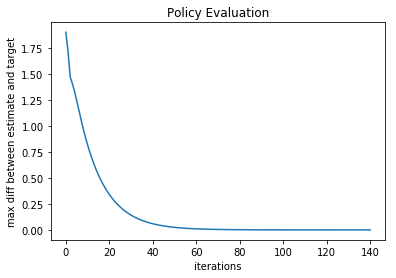

In [57]:
plt.plot(deltas)
plt.xlabel('iterations')
plt.ylabel('max diff between estimate and target')
plt.title('Policy Evaluation')
plt.show()